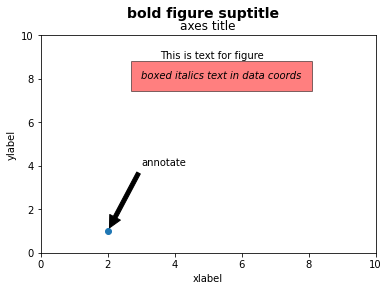

In [3]:
fig = plt.figure()
ax = fig.add_subplot()


# 分别为figure和ax设置标题，注意两者的位置是不同的
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

# 设置x和y轴标签
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# 设置x和y轴显示范围均为0到10
ax.axis([0, 10, 0, 10])

# 在子图上添加文本
ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# 在画布上添加文本，一般在子图上添加文本是更常见的操作，这种方法很少用
fig.text(0.4,0.8,'This is text for figure')

ax.plot([2], [1], 'o')
# 添加注解
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),arrowprops=dict(facecolor='black', shrink=0.05));


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime


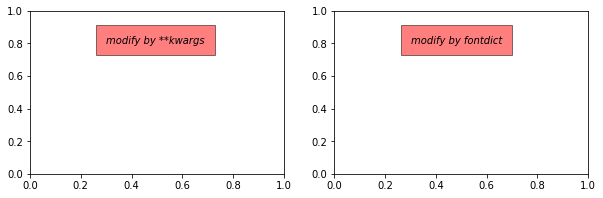

In [4]:
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,2)

# 使用关键字参数修改文本样式
axes[0].text(0.3, 0.8, 'modify by **kwargs', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10});

# 使用fontdict参数修改文本样式
font = {'bbox':{'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, 'style':'italic'}
axes[1].text(0.3, 0.8, 'modify by fontdict', fontdict=font);

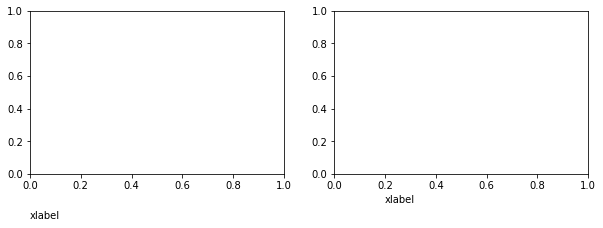

In [5]:
# 观察labelpad和loc参数的使用效果
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,2)
axes[0].set_xlabel('xlabel',labelpad=20,loc='left')

# loc参数仅能提供粗略的位置调整，如果想要更精确的设置标签的位置，可以使用position参数+horizontalalignment参数来定位
# position由一个元组过程，第一个元素0.2表示x轴标签在x轴的位置，第二个元素对于xlabel其实是无意义的，随便填一个数都可以
# horizontalalignment='left'表示左对齐，这样设置后x轴标签就能精确定位在x=0.2的位置处
axes[1].set_xlabel('xlabel', position=(0.2, _), horizontalalignment='left');

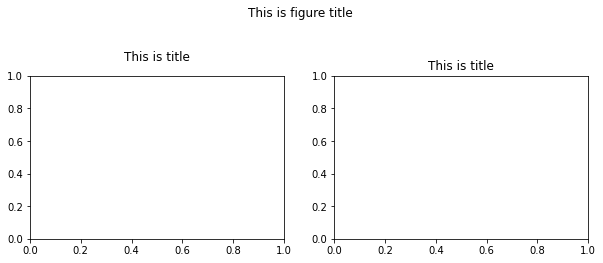

In [11]:
# 观察pad参数的使用效果
fig = plt.figure(figsize=(10,3))
fig.suptitle('This is figure title',y=1.2) # 通过参数y设置高度
axes = fig.subplots(1,2)
axes[0].set_title('This is title',pad=15)
axes[1].set_title('This is title',pad=6);



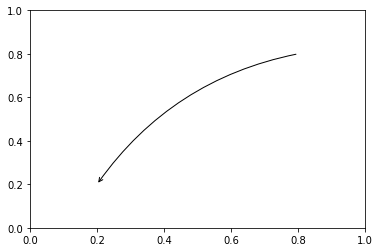

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
ax.annotate("",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2")
            );

In [13]:
x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)


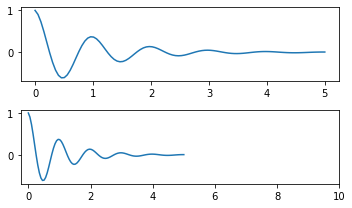

In [14]:
# 使用axis的set_ticks方法手动设置标签位置的例子，该案例中由于tick设置过大，所以会影响绘图美观，不建议用此方式进行设置tick
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
axs[1].xaxis.set_ticks(np.arange(0., 10.1, 2.));


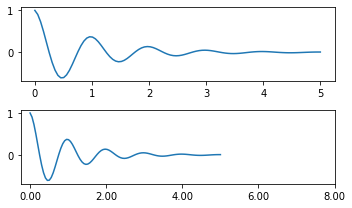

In [15]:
# 使用axis的set_ticklabels方法手动设置标签格式的例子
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
ticks = np.arange(0., 8.1, 2.)
tickla = [f'{tick:1.2f}' for tick in ticks]
axs[1].xaxis.set_ticks(ticks)
axs[1].xaxis.set_ticklabels(tickla);

<a list of 14 Line2D ticklines objects>


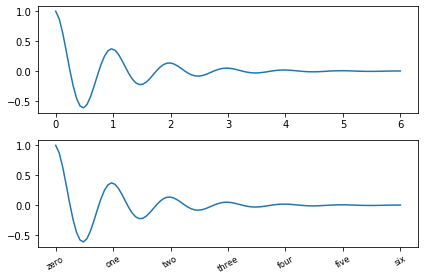

In [16]:
#一般绘图时会自动创建刻度，而如果通过上面的例子使用set_ticks创建刻度可能会导致tick的范围与所绘制图形的范围不一致的问题。
#所以在下面的案例中，axs[1]中set_xtick的设置要与数据范围所对应，然后再通过set_xticklabels设置刻度所对应的标签
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(6, 4), tight_layout=True)
x1 = np.linspace(0.0, 6.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
axs[0].plot(x1, y1)
axs[0].set_xticks([0,1,2,3,4,5,6])

axs[1].plot(x1, y1)
axs[1].set_xticks([0,1,2,3,4,5,6])#要将x轴的刻度放在数据范围中的哪些位置
axs[1].set_xticklabels(['zero','one', 'two', 'three', 'four', 'five','six'],#设置刻度对应的标签
                   rotation=30, fontsize='small')#rotation选项设定x刻度标签倾斜30度。
axs[1].xaxis.set_ticks_position('bottom')#set_ticks_position()方法是用来设置刻度所在的位置，常用的参数有bottom、top、both、none
print(axs[1].xaxis.get_ticklines());


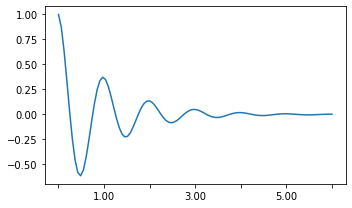

In [17]:
# 接收函数的例子
def formatoddticks(x, pos):
    """Format odd tick positions."""
    if x % 2:
        return f'{x:1.2f}'
    else:
        return ''

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(x1, y1)
ax.xaxis.set_major_formatter(formatoddticks);

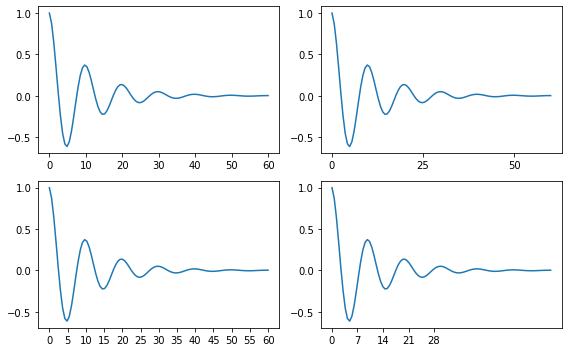

In [18]:
# 接收各种locator的例子
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

locator = matplotlib.ticker.AutoLocator()
axs[0, 0].xaxis.set_major_locator(locator)

locator = matplotlib.ticker.MaxNLocator(nbins=3)
axs[0, 1].xaxis.set_major_locator(locator)


locator = matplotlib.ticker.MultipleLocator(5)
axs[1, 0].xaxis.set_major_locator(locator)


locator = matplotlib.ticker.FixedLocator([0,7,14,21,28])
axs[1, 1].xaxis.set_major_locator(locator);

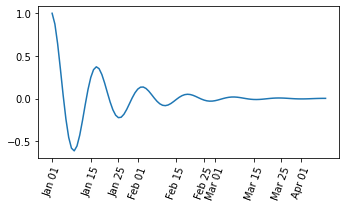

In [19]:
# 特殊的日期型locator和formatter
locator = mdates.DayLocator(bymonthday=[1,15,25])
formatter = mdates.DateFormatter('%b %d')

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(x1))]
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70);
